In [ ]:
# At first Mount Drive for accessing Datasets.
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import time
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read COVID_19 csv file
covid=pd.read_csv('/content/drive/My Drive/COVID_19/COVID_19.csv')
covid.head()

,age,gender,Region1,Region2,detected_state,nationality,Travel_hist,Disease_hist,Symptom,Label
0,23,Female,Bebusarai,Bebusarai,Bihar,India,India,Null,Null,Negative
1,41,Female,Balasore,Balasore,Orissa,India,India,Diabetes,Null,Negative
2,21,Female,Erode,Erode,Tamil Nadu,India,India,Null,Fever,Negative
3,55,Male,Gurugram,Gurugram,Haryana,Italy,Italy,BP,Fever,Positive
4,41,Female,Bhilwara,Bhilwara,Rajasthan,India,India,BP,Dry Cough,Positive


In [ ]:
covid.keys()

Index(['age', 'gender', 'Region1 ', 'Region2', 'detected_state', 'nationality',
       'Travel_hist', 'Disease_hist', 'Symptom', 'Label'],
      dtype='object')

In [ ]:
covid.isnull().sum()

age               0
gender            0
Region1           0
Region2           0
detected_state    0
nationality       0
Travel_hist       0
Disease_hist      0
Symptom           0
Label             0
dtype: int64

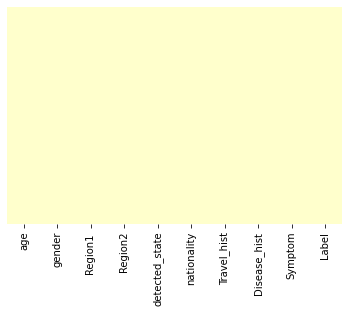

In [ ]:
sns.heatmap(covid.isnull(),yticklabels=False,cbar=False,cmap='YlOrRd')

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             974 non-null    int64 
 1   gender          974 non-null    object
 2   Region1         974 non-null    object
 3   Region2         974 non-null    object
 4   detected_state  974 non-null    object
 5   nationality     974 non-null    object
 6   Travel_hist     974 non-null    object
 7   Disease_hist    974 non-null    object
 8   Symptom         974 non-null    object
 9   Label           974 non-null    object
dtypes: int64(1), object(9)
memory usage: 76.2+ KB


In [ ]:
covid.groupby('gender').first()

,age,Region1,Region2,detected_state,nationality,Travel_hist,Disease_hist,Symptom,Label
gender,,,,,,,,,
Female,23,Bebusarai,Bebusarai,Bihar,India,India,Null,Null,Negative
Male,55,Gurugram,Gurugram,Haryana,Italy,Italy,BP,Fever,Positive


In [ ]:
dic={'Female':0,'Male':1}
covid.replace({'gender':dic},inplace=True)
covid['gender'].unique()

array([0, 1])

In [ ]:
covid.groupby('Label').first()

,age,gender,Region1,Region2,detected_state,nationality,Travel_hist,Disease_hist,Symptom
Label,,,,,,,,,
Negative,23,0,Bebusarai,Bebusarai,Bihar,India,India,Null,Null
Positive,55,1,Gurugram,Gurugram,Haryana,Italy,Italy,BP,Fever


In [ ]:
dic1={'Negative':0,'Positive':1}
covid.replace({'Label':dic1},inplace=True)
covid['Label'].unique()

array([0, 1])

In [ ]:
covid.groupby('nationality').first()

,age,gender,Region1,Region2,detected_state,Travel_hist,Disease_hist,Symptom,Label
nationality,,,,,,,,,
Canada,35,0,Lucknow,Lucknow,Uttar Pradesh,Italy,Null,Dry Cough,1
India,23,0,Bebusarai,Bebusarai,Bihar,India,Null,Null,0
Indonesia,41,0,Hyderabad,Hyderabad,Telangana,India,BP,Dry Cough,1
Italy,55,1,Gurugram,Gurugram,Haryana,Italy,BP,Fever,1
Phillipines,47,1,Mumbai,Mumbai,Maharashtra,Dubai,BP,Dry Cough,1
Thailand,75,1,Perundurai,Erode,Tamil Nadu,Singapore,Diabetes,Dry Cough,1
United Kingdom,41,1,Kochi,Ernakulam,Kerala,Spain,BP,Dry Cough,1


In [ ]:
dic2={'Canada':0,'India':1,'Indonesia':2,'Italy':3,'Phillipines':4,'Thailand':5,'United Kingdom':6}
covid.replace({'nationality':dic2},inplace=True)
covid['nationality'].unique()

array([1, 3, 2, 5, 4, 6, 0])

In [ ]:
covid.groupby('Symptom').first()

,age,gender,Region1,Region2,detected_state,nationality,Travel_hist,Disease_hist,Label
Symptom,,,,,,,,,
Breathing Problem,40,1,Bengaluru,Bengaluru,Karnataka,1,Dubai,BP,1
Dry Cough,41,0,Bhilwara,Bhilwara,Rajasthan,1,India,BP,1
Fever,21,0,Erode,Erode,Tamil Nadu,1,India,Null,0
Null,23,0,Bebusarai,Bebusarai,Bihar,1,India,Null,0
Sore Throat,41,0,Satna,Satna,Madhya Pradesh,1,India,Diabetes,0


In [ ]:
dic3={'Null':0,'Breathing Problem':1,'Dry Cough':2,'Fever':3,'Sore Throat':4}
covid.replace({'Symptom':dic3},inplace=True)
covid['Symptom'].unique()

array([0, 3, 2, 4, 1])

In [ ]:
covid.groupby('Disease_hist').first()

,age,gender,Region1,Region2,detected_state,nationality,Travel_hist,Symptom,Label
Disease_hist,,,,,,,,,
BP,55,1,Gurugram,Gurugram,Haryana,3,Italy,3,1
Diabetes,41,0,Balasore,Balasore,Orissa,1,India,0,0
Null,23,0,Bebusarai,Bebusarai,Bihar,1,India,0,0


In [ ]:
dic4={'Null':0,'BP':1,'Diabetes':2}
covid.replace({'Disease_hist':dic4},inplace=True)
covid['Disease_hist'].unique()

array([0, 2, 1])

In [ ]:
covid.groupby('detected_state').first()

,age,gender,Region1,Region2,nationality,Travel_hist,Disease_hist,Symptom,Label
detected_state,,,,,,,,,
Andhra Pradesh,65,1,Visakapatnam,Visakhapatnam,1,Sri Lanka,2,2,1
Bihar,23,0,Bebusarai,Bebusarai,1,India,0,0,0
Chandigarh,23,0,Chandigarh,Chandigarh,1,Karimnagar,0,2,1
Chhattisgarh,41,0,Bastar,Bastar,1,India,2,0,0
Delhi,41,1,North East Delhi,North East Delhi,1,India,2,0,0
Goa,29,1,Goa,Goa,1,India,0,3,1
Gujarat,32,1,Vadodara,Vadodara,1,Delhi,0,2,1
Haryana,55,1,Gurugram,Gurugram,3,Italy,1,3,1
Himachal Pradesh,41,0,Kangra,Kangra,1,UK,1,2,1


In [ ]:
# Here i am not using dictionary for coverting Object type feature into Int. Using scikit learns encoder convert Obj to int.
from sklearn.preprocessing import LabelEncoder   

encoder=LabelEncoder()
encoded_values=encoder.fit_transform(covid['detected_state'].values)
covid['detected_state'] = pd.Series(encoded_values, index=covid.index)
covid['detected_state'].unique()

array([ 1, 18, 22,  7, 21,  4, 23, 13, 10, 14, 24,  6, 20, 12, 11,  3, 26,
       16,  0,  9, 17, 15,  2,  5, 25, 19,  8])

In [ ]:
covid.groupby('Travel_hist').first()

,age,gender,Region1,Region2,detected_state,nationality,Disease_hist,Symptom,Label
Travel_hist,,,,,,,,,
Air Arabia G9,27,0,Kasaragod,Kasaragod,11,1,0,2,1
Arrived,9,0,Bengaluru,Bengaluru,10,1,0,3,1
Austria,45,1,East Delhi,East Delhi,4,1,1,3,1
Bahrain,41,1,Pune,Pune,14,1,1,2,1
Birmingham,50,1,Aizawl,Aizawl,16,1,2,3,1
...,...,...,...,...,...,...,...,...,...
US,89,0,Ranni,Pathanamthitta,11,1,2,1,1
USA,41,1,Mumbai,Mumbai,14,1,1,2,1
United Kingdom,41,1,Kochi,Kannur,11,1,1,2,1


In [ ]:
encoder=LabelEncoder()
values=encoder.fit_transform(covid['Travel_hist'].values)
covid['Travel_hist'] = pd.Series(values, index=covid.index)
covid['Travel_hist'].unique()

array([24, 30, 42, 13, 10, 62, 41, 59, 71, 72, 65,  7, 64, 23,  0, 27, 74,
        2, 48, 12, 76, 31, 47, 15, 67, 44, 60, 19, 36, 28, 69, 73, 56, 66,
       25, 33, 53, 40, 63, 68, 18, 49, 58, 35, 46, 50, 75, 26, 54, 14, 55,
       57,  9, 38, 20, 22, 29, 21,  8, 70, 43, 39, 52, 61,  5, 45,  1, 51,
       34, 37, 17, 16,  4, 32, 11,  3,  6])

In [ ]:
covid['Region1 '].unique()

array(['Bebusarai', 'Balasore', 'Erode', 'Gurugram', 'Bhilwara',
       'Coimbatore', 'North East Delhi', 'Hyderabad', 'Satna', 'Kodagu',
       'Pune', 'Banaras', 'Bengaluru', 'Vadodara',
       'Shaheed Bhagat Singh Nagar', 'Sankoo Valley', 'Jaipur',
       'Kalanadu', 'Perundurai', 'Palakkad', 'Delhi', 'Mumbai', 'Ajmer',
       'Lucknow', 'Kozhencherry', 'Bhatinda', 'Ranni', 'Ernakulam',
       'Gandhinagar', 'Bastar', 'Pilibhit', 'Birbhum', 'Kolasib',
       'Kareemnagar', 'Ladakh', 'Visakapatnam', 'Jahangirpuri',
       'Shrungartali', 'Wayanad', 'Kalyan', 'Bandipora', 'Gwalior',
       'Ahmedabad', 'Chusot', 'Jhunjhunu', 'Vishakhapatnam', 'Indore',
       'Garhshankar', 'Chitrakoot', 'Kochi', 'Bhopal', 'Phillaur',
       'Kasaragod', 'Kannur', 'Aurangabad', 'East Delhi', 'Rajahmundry',
       'Kollam', 'Rayalseema', 'Mysuru', 'Karimnagar', 'Pimpri-Chinchwad',
       'Jabalpur', 'Janakpuri', 'Nagpur', 'Leh', 'Gowribidanur',
       'Chikkaballapura', 'Malappuram', 'Bagalkot', 'Amri

In [ ]:
encoder=LabelEncoder()
value1=encoder.fit_transform(covid['Region1 '].values)
covid['Region1 '] = pd.Series(value1, index=covid.index)
covid['Region1 '].unique()

array([ 17,  11,  46,  58,  24,  37, 131,  63, 160,  93, 144,  13,  19,
       183, 161, 158,  69,  77, 139, 133,  39, 116,   4, 107, 100,  21,
       151,  45,  49,  16, 141,  27,  95,  83, 103, 188,  68, 164, 191,
        78,  14,  59,   1,  36,  73, 190,  66,  50,  34,  92,  25, 140,
        86,  82,   9,  43, 147,  97, 152, 122,  85, 142,  67,  71, 123,
       106,  55,  32, 111,  10,   7, 165,   6,  23, 192,  62, 157,  33,
         2, 114, 170,  12, 156,  31, 101,  42,  87, 148,  98,  26, 174,
       102,  56, 150,   0, 117, 124,  65,   5, 132, 187,  61, 138,  35,
        76, 179,  29, 146, 185, 162, 184,  96, 126,  53, 193, 171,  28,
       121, 155, 169,  70, 166,  54,  38,  72, 163,  84,  88,  47, 159,
       167, 118,  75,  41,  99, 129, 110,  64, 113,  94,  30, 137, 143,
        20, 112, 134, 149, 186,  80, 172,  74, 105, 127,  51, 136, 182,
        91, 175,   8,  81,  90,  44,  89, 178, 145, 135, 177, 108, 128,
       176,  48, 119, 154,  52, 181, 153,  79, 120, 130,  60,  1

In [ ]:
covid['Region2'].unique()

array(['Bebusarai', 'Balasore', 'Erode', 'Gurugram', 'Bhilwara',
       'Coimbatore', 'North East Delhi', 'Hyderabad', 'Satna', 'Kodagu',
       'Pune', 'Banaras', 'Bengaluru', 'Vadodara',
       'Shaheed Bhagat Singh Nagar', 'Kargil', 'Jaipur', 'Kasaragod',
       'Palakkad', 'Delhi', 'Mumbai', 'Ajmer', 'Lucknow',
       'Pathanamthitta', 'Bhatinda', 'Ernakulam', 'Gandhinagar', 'Bastar',
       'Pilibhit', 'Birbhum', 'Kolasib', 'Kareemnagar', 'Leh',
       'Visakhapatnam', 'Jahangirpuri', 'Ratnagiri', 'Wayanad', 'Kalyan',
       'Bandipora', 'Gwalior', 'Ahmedabad', 'Jhunjhunu', 'Vishakhapatnam',
       'Indore', 'Hoshiarpur', 'Chitrakoot', 'Kannur', 'Bhopal',
       'Jalandhar', 'Aurangabad', 'East Delhi', 'East Godavari', 'Kollam',
       'Rayalseema', 'Mysuru', 'Karimnagar', 'Pimpri-Chinchwad',
       'Jabalpur', 'South West Delhi', 'Nagpur', 'Chikkaballapura',
       'Malappuram', 'Bagalkot', 'Amritsar', 'Solapur', 'Alirajpur',
       'Bhavnagar', 'West Delhi', 'Dharwad', 'Sangli',

In [ ]:
encoder=LabelEncoder()
values=encoder.fit_transform(covid['Region2'].values)
covid['Region2'] = pd.Series(values, index=covid.index)
covid['Region2'].unique()

array([ 16,  12,  40,  50,  21,  31, 102,  54, 128,  77, 115,  13,  17,
       145, 129,  73,  60,  75, 104,  34,  92,   5,  86, 108,  19,  39,
        42,  15, 111,  24,  78,  72,  85, 148,  59, 120, 150,  67,  14,
        51,   2,  64, 149,  57,  53,  30,  70,  22,  61,  10,  37,  38,
        80, 121,  97,  74, 112,  58, 133,  98,  27,  90,  11,   8, 131,
         7,  20, 151,  35, 126,  29,   3, 114, 123, 135, 125,  26,  82,
       103,  76, 117,  18,  23, 138,  43, 118,   0,  93,  99,  56,   6,
       113, 147,  52, 109,  66, 142,  25, 116, 137,  65, 146,  79,  46,
       152, 136, 119,  55, 124,   1, 134,  62,  47,  33,  63, 130,  41,
       127, 132,  94, 110,  81,  44,  89,  32, 105, 107, 144,  83, 139,
         9,  69, 141, 106,  87, 122, 140,  95,  48,  45, 143,  68,  96,
       101, 100,  36,  91,  71,   4,  49,  84,  28,  88])

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             974 non-null    int64
 1   gender          974 non-null    int64
 2   Region1         974 non-null    int64
 3   Region2         974 non-null    int64
 4   detected_state  974 non-null    int64
 5   nationality     974 non-null    int64
 6   Travel_hist     974 non-null    int64
 7   Disease_hist    974 non-null    int64
 8   Symptom         974 non-null    int64
 9   Label           974 non-null    int64
dtypes: int64(10)
memory usage: 76.2 KB


In [ ]:
X=covid[covid.columns[0:-1]]
y=covid[covid.columns[-1]]
print('Shape of Independent Datasets : ',X.shape)
print('Shape of Dependent Datasets : ',y.shape)

Shape of Independent Datasets :  (974, 9)
Shape of Dependent Datasets :  (974,)


33

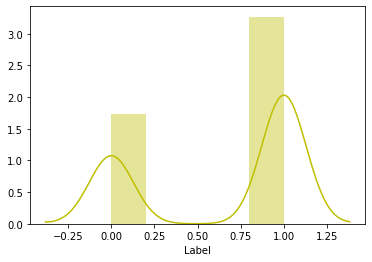

In [ ]:
sns.distplot(y,color='y')
gc.collect()

## Scaling of Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler as Scaler
sc=Scaler()
X1=pd.DataFrame(data=sc.fit_transform(X))
X1.columns=['age', 'gender', 'Region1 ', 'Region2', 'detected_state', 'nationality','Travel_hist', 'Disease_hist', 'Symptom']
X1.head(2)

,age,gender,Region1,Region2,detected_state,nationality,Travel_hist,Disease_hist,Symptom
0,0.223404,0.0,0.088083,0.105263,0.038462,0.166667,0.315789,0.0,0.0
1,0.414894,0.0,0.056995,0.078947,0.692308,0.166667,0.315789,1.0,0.0


## Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


223

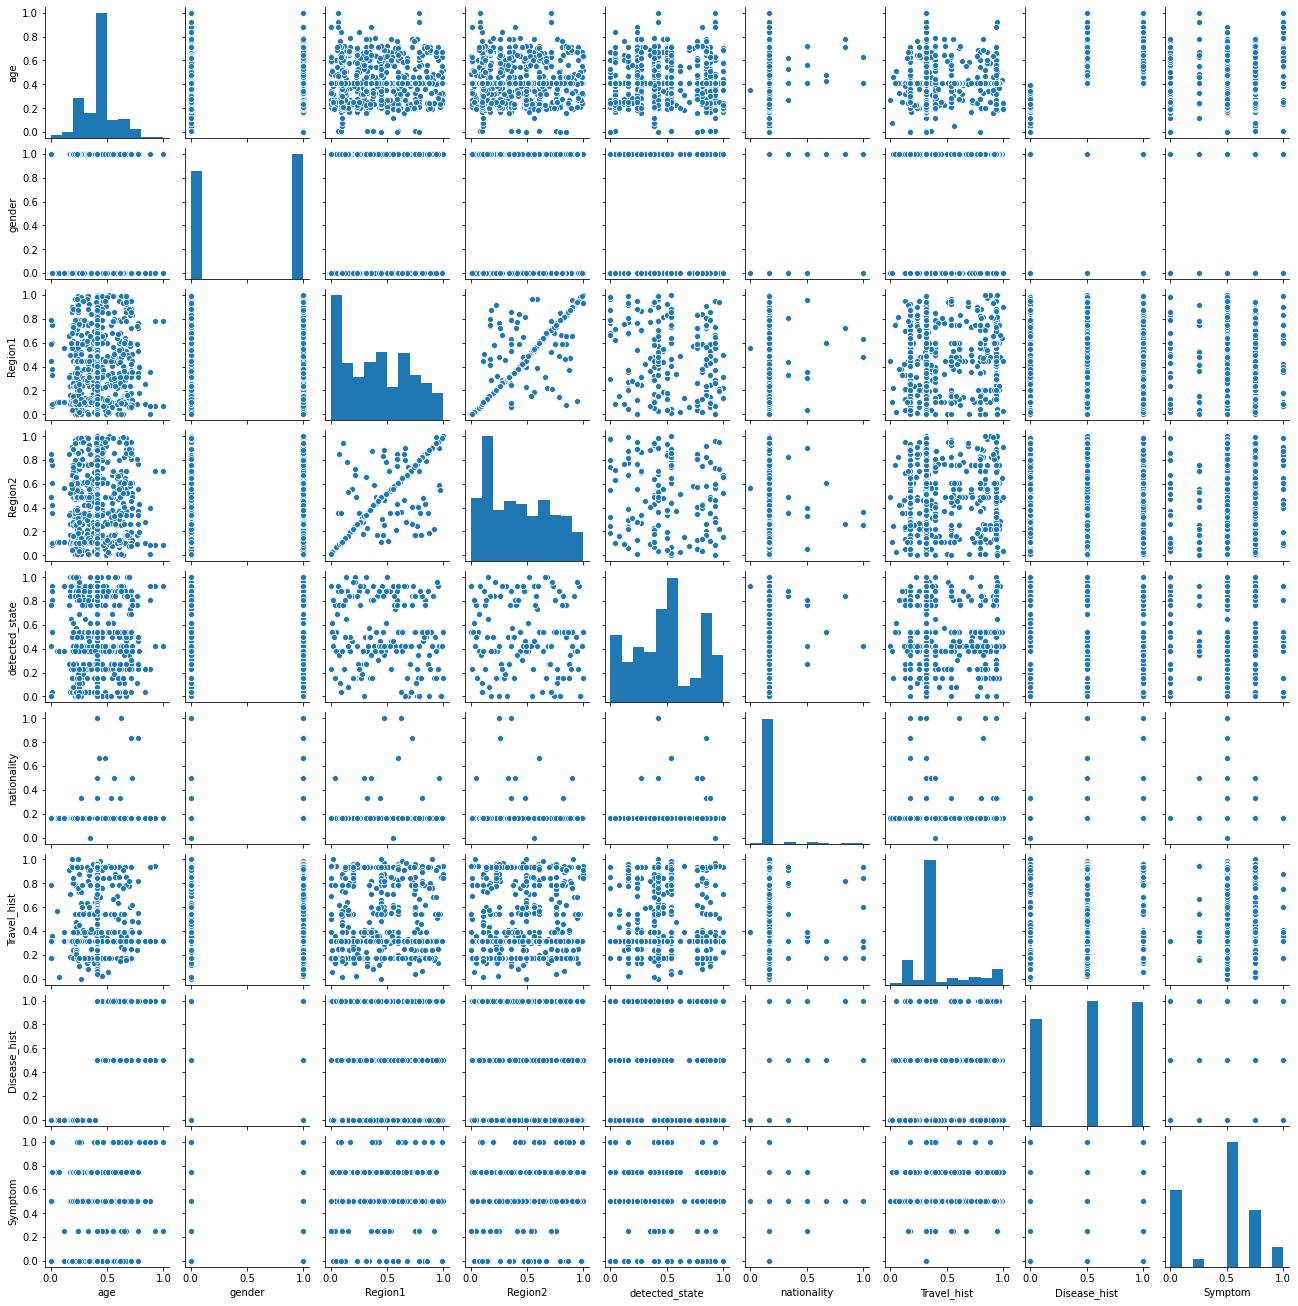

In [ ]:
sns.pairplot(X1,size=2)
gc.collect()

## Apply Imbalanced learning on Covid_19

### Binary_classifier

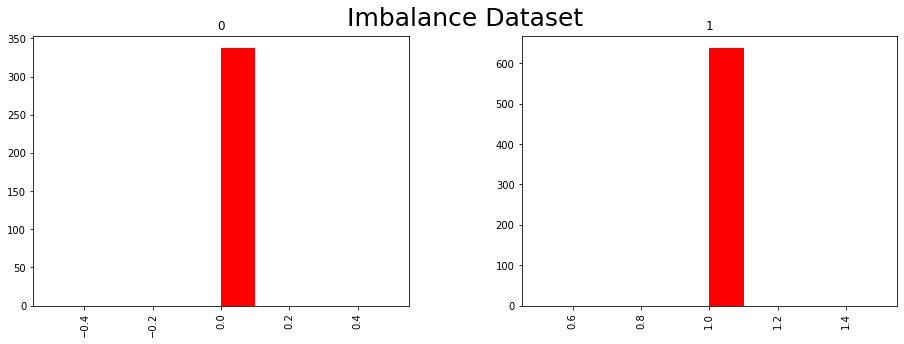

190068

In [ ]:
covid.hist(by='Label',column='Label',figsize=(15,5),color='r')
plt.suptitle('Imbalance Dataset',fontsize=25)
plt.show()
gc.collect()

## Balancing of dependent variable

In [ ]:
from imblearn.combine import SMOTETomek    
smt=SMOTETomek(ratio='auto')
X_smot,y_smot=smt.fit_sample(X1,y)  

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
df=pd.DataFrame(y_smot)
df.columns=['Label']
print(df['Label'].value_counts())

1    635
0    635
Name: Label, dtype: int64


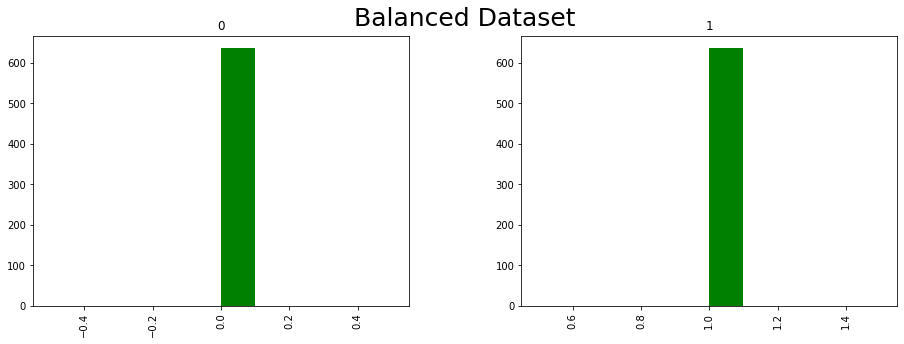

5711

In [ ]:
# Equal size of depenedent variable after balancing with figure.
df.hist(by='Label',column='Label',figsize=(15,5),color='g')
plt.suptitle('Balanced Dataset',fontsize=25)
plt.show()
gc.collect()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_smot,y_smot,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(889, 9)
(381, 9)
(889,)
(381,)


## Hyper Tunning

In [ ]:
# 1) AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
params={'base_estimator':[None,1,5,10,15,20],
        'n_estimators':[50,100,150,200,250,300],
        'learning_rate':[1.0,1.5,2.0,2.5,3.0,3.5,4.0],
        'algorithm':['SAMME.R','SAMME'],
        'random_state':[None,20,30,50,80,100]
       }

grid_search=GridSearchCV(estimator=ada,param_grid=params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search=grid_search.fit(X_smot,y_smot)
grid_search.best_params_

{'algorithm': 'SAMME',
 'base_estimator': None,
 'learning_rate': 1.5,
 'n_estimators': 200,
 'random_state': None}

In [ ]:
ada1=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.5,n_estimators=150,base_estimator=None)

kfold=StratifiedKFold(n_splits=10,random_state=0)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
out=cross_val_score(ada1,X_smot,y_smot,cv=kfold)
out

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([0.97637795, 0.97637795, 1.        , 0.98425197, 0.99212598,
       0.99212598, 0.99212598, 0.97637795, 1.        , 0.99212598])

In [ ]:
# 2) RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()

dist={'max_depth':[3,5,10,15,20,25,None],
      'criterion':['gini','entropy'],'bootstrap':[True,False],
      'min_samples_split':[2,5,10,15],
      'min_weight_fraction_leaf':[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0],'oob_score':[True,False]
      }

grid_search=GridSearchCV(estimator=rfc,param_grid=dist,scoring='accuracy',cv=5,n_jobs=-1)
grid_search=grid_search.fit(X_smot,y_smot)
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'oob_score': False}

In [ ]:
rfc=RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=15,min_samples_split=5,min_weight_fraction_leaf=0.1,oob_score=False)

kfold=StratifiedKFold(n_splits=10,random_state=0)  
l=cross_val_score(rfc,X_smot,y_smot,cv=kfold)
l

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([0.93700787, 0.94488189, 0.94488189, 0.99212598, 0.95275591,
       0.96850394, 0.97637795, 0.92913386, 0.95275591, 0.92913386])

In [ ]:
# 3) Xgboost
import xgboost
from xgboost import XGBClassifier
xgb=xgboost.XGBClassifier()

params={"learning_rate": [0.0,0.5,1.0,1.5,2.0,2.5] ,
        "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
        "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ],
        "booster":['gbtree','gblinear','dart']
        }

grid_search=GridSearchCV(estimator=xgb,param_grid=params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search=grid_search.fit(X_smot,y_smot)
grid_search.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.3,
 'gamma': 0.0,
 'learning_rate': 1.0,
 'max_depth': 5}

In [ ]:
xgb1=xgboost.XGBClassifier(base_score=0.5, booster='gbtree',colsample_bytree=0.3,gamma=0.0,learning_rate=1.8,max_depth=5)

kfold=StratifiedKFold(n_splits=10,random_state=0)  
results=cross_val_score(xgb1,X_smot,y_smot,cv=kfold)
results

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([0.98425197, 0.98425197, 1.        , 0.99212598, 1.        ,
       1.        , 1.        , 0.98425197, 1.        , 0.99212598])

In [ ]:
# 4) DecisionTree
from sklearn.tree import DecisionTreeClassifier 
clf=DecisionTreeClassifier()

params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[None,1,5,10,15],
        'min_samples_split':[2,5,10,15],'min_samples_leaf':[1,1.1,1.2,1.3,2,2.1],
        'class_weight':['balanced',None],'presort':[True,False],'ccp_alpha':[0.0,0.5,1.0,1.5,2.0,2.5],
        'min_weight_fraction_leaf':[0.0,0.5]
        }

grid_search=GridSearchCV(estimator=clf,param_grid=params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search=grid_search.fit(X_smot,y_smot)
grid_search.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'splitter': 'best'}

In [ ]:
clf=DecisionTreeClassifier(ccp_alpha=0.0,criterion='entropy',max_depth=15,min_samples_split=5,min_samples_leaf=1,
                          splitter='best',min_weight_fraction_leaf=0.1)

kfold=StratifiedKFold(n_splits=10,random_state=0)  
results=cross_val_score(clf,X_smot,y_smot,cv=kfold)
results

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([0.95275591, 0.93700787, 0.91338583, 0.94488189, 0.96850394,
       0.92125984, 0.97637795, 0.95275591, 0.95275591, 0.96062992])

In [ ]:
# 5) Knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

params={'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,45,50,60,70,80], 
        'n_jobs':[None,-1,1,2],'p':[1,2],
        'n_neighbors':[5,10,40,80],'weights':['distance','uniform']
        }

grid_search=GridSearchCV(estimator=knn,param_grid=params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search=grid_search.fit(X_smot,y_smot)
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [ ]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=30,n_jobs=None,n_neighbors=5,p=2,weights='distance')

kfold=StratifiedKFold(n_splits=10,random_state=0)  
results=cross_val_score(knn,X_smot,y_smot,cv=kfold)
results

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


array([0.95275591, 0.97637795, 0.96850394, 0.99212598, 0.99212598,
       0.98425197, 0.99212598, 0.97637795, 0.99212598, 0.97637795])

In [ ]:
# 6) SVM 
from sklearn.svm import SVC
svc=SVC()

parameters = [{'C':[1, 10, 100, 1000],'kernel': ['linear'],'shrinking':[True,False],
               'decision_function_shape':['ovo','ovr'],'tol':[1e-15,1e-10,1e-8,1e-3,1e-2,1]},
              
              {'C':[1, 10, 100, 1000],'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'shrinking':[True,False]
               ,'decision_function_shape':['ovo','ovr'],'tol':[1e-15,1e-10,1e-8,1e-3,1e-2,1]},
              
              {'C':[1, 10, 100, 1000],'kernel':['poly','sigmoid'],'coef0': [0.0, 0.1, 0.5],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
               'tol':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30],'shrinking':[True,False],'decision_function_shape':['ovo','ovr']}]

grid_search = GridSearchCV(estimator=svc,param_grid= parameters,scoring='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X_smot,y_smot)
grid_search.best_params_

In [ ]:
## 7) LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

params={'penalty':['l2','l1'],
    'C':[1.0,10,50,100,1000],
    'fit_intercept':[True,False],
    'intercept_scaling':[1,2.0,3.5,4.0,5.5,6.5,7.5,8.5,9.5],
    'class_weight':[None,'balanced'],
    'random_state':[None,10,20,30,40,50,100],
    'solver':['warn','newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[100,150,200,500,750,1000],
    'multi_class':['warn','ovr', 'multinomial', 'auto'],
    'warm_start':[False,True],
    'n_jobs':[None,-1,1,2,3]}

grid_search = GridSearchCV(estimator=lr,param_grid=params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X_smot,y_smot)
grid_search.best_params_

In [ ]:
lr=LogisticRegression()

kfold=StratifiedKFold(n_splits=10,random_state=0)  
results=cross_val_score(lr,X_smot,y_smot,cv=kfold)
results

In [ ]:
from sklearn.svm import SVC
svc=SVC(C=1,kernel='linear',gamma=0.2)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1,penalty='l2',n_jobs=1,solver='liblinear')

from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.5,n_estimators=150,base_estimator=None)

from xgboost import XGBClassifier
xg=XGBClassifier(base_score=0.5,booster='gbtree',colsample_bylevel=0.1,colsample_bynode=0.1,colsample_bytree=0.3,gamma=0.0,
                  learning_rate=1.8,n_jobs=1,min_child_weight=3,max_depth=5)

from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=0.5,fit_prior=False)

from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB(var_smoothing=1e-2)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm='auto',leaf_size=30,n_jobs=None,n_neighbors=5,p=2,weights='distance')

from sklearn.ensemble import RandomForestClassifier            
rfc=RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=15,min_samples_split=5,min_weight_fraction_leaf=0.1,oob_score=False)

from sklearn import tree
clf=tree.DecisionTreeClassifier(ccp_alpha=0.0,criterion='entropy',max_depth=15,min_samples_split=5,min_samples_leaf=1,
                                splitter='best',min_weight_fraction_leaf=0.1)

gc.collect()

0

In [ ]:
classifier={'MultinomialNB':mnb,'GaussianNB':gnb,'Logistic':lr,'RandomForest':rfc,'Adaboost': ada,
            'XGBoost':xg,'KNeighbors':knn,'SVM':svc,'DecisionTreeClassifier':clf} 
classifie=sorted(classifier.keys())
print(classifie)
df=pd.DataFrame(classifie,columns=['Classifier'])
df

['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'Logistic', 'MultinomialNB', 'RandomForest', 'SVM', 'XGBoost']


,Classifier
0,Adaboost
1,DecisionTreeClassifier
2,GaussianNB
3,KNeighbors
4,Logistic
5,MultinomialNB
6,RandomForest
7,SVM
8,XGBoost


In [ ]:
# Predict and Storing Score of each Classifier
param=[]
l=[]                                 
l=pd.DataFrame(l)
for n,c in sorted(classifier.items()):                    # Pick up keys & values present in classifier dictionary.
    kfold=StratifiedKFold(n_splits=10,random_state=None)  # Apply StratifiedKFold for Cross_validation of Balanced Data.
    results=cross_val_score(c,X_smot,y_smot,cv=kfold)     # 10 different Score are store in results variable for each classifier.
    param.append((n,[results.mean()]))                    # Store Mean of each classifier in a list.
    result=pd.DataFrame(results)                          # Create DataFrame of each Classifier with 10 different score.
    l=pd.concat([l,result],axis=1,ignore_index=True)      # Concatenation two Dataframe into one.

l.columns=['Adaboost','DecisionTree','GaussianNB','KNeighbors','Logistic','MultinomialNB','RandomForest','SVM','XGBoost']    # Provide column name
l                                                         # Show DataFrame

,Adaboost,DecisionTree,GaussianNB,KNeighbors,Logistic,MultinomialNB,RandomForest,SVM,XGBoost
0,0.992126,0.905512,0.842520,0.960630,0.771654,0.700787,0.905512,0.834646,0.968504
1,0.984252,0.944882,0.842520,0.984252,0.818898,0.740157,0.937008,0.897638,0.976378
2,0.976378,0.937008,0.818898,0.960630,0.803150,0.748031,0.929134,0.913386,0.976378
3,1.000000,0.944882,0.850394,0.976378,0.826772,0.787402,0.960630,0.905512,0.976378
4,0.992126,0.937008,0.826772,0.976378,0.818898,0.724409,0.952756,0.866142,0.984252
5,1.000000,0.968504,0.803150,0.984252,0.779528,0.732283,0.874016,0.834646,0.976378
6,0.992126,0.968504,0.811024,0.992126,0.834646,0.755906,0.952756,0.913386,1.000000
7,1.000000,0.897638,0.818898,0.968504,0.740157,0.740157,0.905512,0.850394,0.968504
8,1.000000,0.992126,0.858268,0.992126,0.850394,0.748031,0.960630,0.889764,1.000000
9,0.992126,0.952756,0.842520,0.960630,0.708661,0.724409,0.929134,0.803150,1.000000


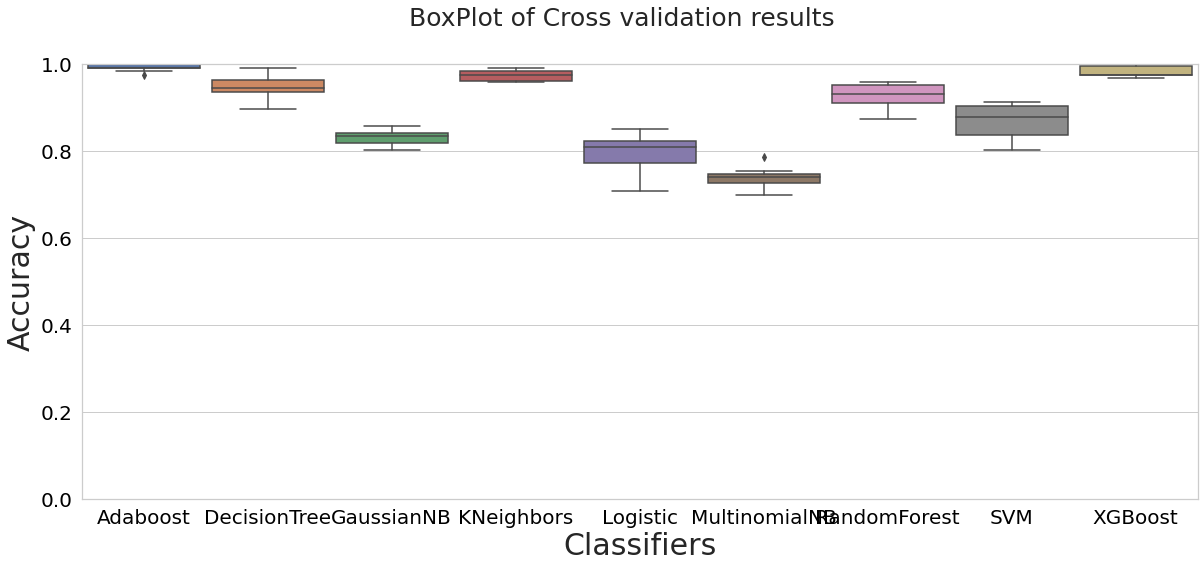

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=l,width=0.9)
boxplot.set_ylim([0.0,1.0])
fig.suptitle('BoxPlot of Cross validation results',fontsize=25)
plt.ylabel('Accuracy',fontsize=30)
plt.xlabel('Classifiers',fontsize=30)
plt.tick_params(axis='both',which='major',colors='black',labelsize=20)
plt.savefig('/content/drive/My Drive/COVID_19/covid.png',dpi=300)
plt.show()

*****************************************************************************************************

1) Classifier is : AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.5,
                   n_estimators=150, random_state=None)

Total time in :  0.2476029396057129
Confusion_matrix is 
 [[181   1]
 [  4 195]]

Precision :  0.9948979591836735
Recall    :  0.9798994974874372
f1_score  :  0.9873417721518988
AUC: 0.987

&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

*****************************************************************************************************

2) Classifier is : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_

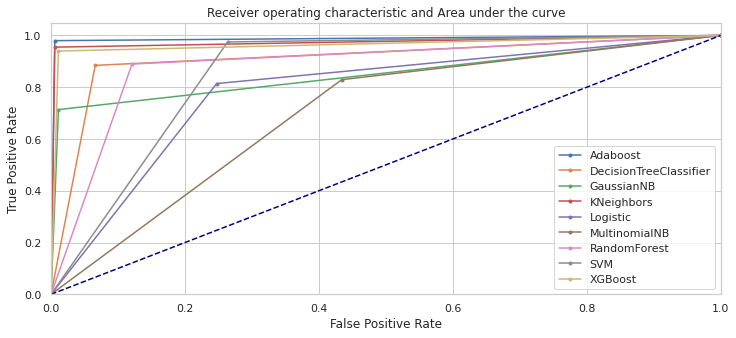

In [ ]:
score = []
i=1
plt.subplots(figsize=(12,5))
for n,c in sorted(classifier.items()):
    start=time.time()
    c.fit(X_train,y_train)
    pred=c.predict(X_test)
    end=time.time()
    print('*****************************************************************************************************\n')
    print("{}) Classifier is : {}\n".format(i,c))
    print("Total time in : ",end-start)

    score.append((n,[accuracy_score(y_test,pred,normalize=True),metrics.precision_score(y_test,pred),
                    metrics.recall_score(y_test, pred),metrics.f1_score(y_test,pred)]))
    
    print("Confusion_matrix is \n",confusion_matrix(y_test,pred))
    precision=print("\nPrecision : ",metrics.precision_score(y_test,pred))      
    recall=print("Recall    : ",metrics.recall_score(y_test,pred))
    f1_score=print("f1_score  : ",metrics.f1_score(y_test,pred))
    
    # ROC AND AUC CURVE                                                             
    fpr,tpr,thresholds=roc_curve(y_test,pred)
    # calculate AUC
    auc=roc_auc_score(y_test,pred)
    print('AUC: %.3f' % auc)
    i=i+1
    
    print('\n&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&\n')
    # plot no skill    
    plt.plot(fpr,tpr,marker='.',label=n)
    
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve',fontsize=12)
plt.legend()
# show the plot
plt.savefig('/content/drive/My Drive/COVID_19/covid_Binary.png',dpi=300)
plt.show()                            

In [ ]:
param_df=pd.DataFrame.from_dict(dict(param),orient='index',columns=['Means'])   
df1=pd.DataFrame.from_dict(dict(score),orient='index',columns=['scores','Precision','Recall','f1_score'])
df1['Accuracy (%)']=df1['scores']*100
df1=pd.concat([param_df,df1],axis=1)
df1                

,Means,scores,Precision,Recall,f1_score,Accuracy (%)
Adaboost,0.992913,0.986877,0.994898,0.979899,0.987342,98.687664
DecisionTreeClassifier,0.944882,0.908136,0.936170,0.884422,0.909561,90.813648
GaussianNB,0.831496,0.845144,0.986111,0.713568,0.827988,84.514436
KNeighbors,0.975591,0.973753,0.994764,0.954774,0.974359,97.375328
Logistic,0.795276,0.784777,0.782609,0.814070,0.798030,78.477690
MultinomialNB,0.740157,0.703412,0.676230,0.829146,0.744921,70.341207
RandomForest,0.930709,0.884514,0.889447,0.889447,0.889447,88.451444
SVM,0.870866,0.860892,0.801653,0.974874,0.879819,86.089239
XGBoost,0.982677,0.963255,0.989418,0.939698,0.963918,96.325459


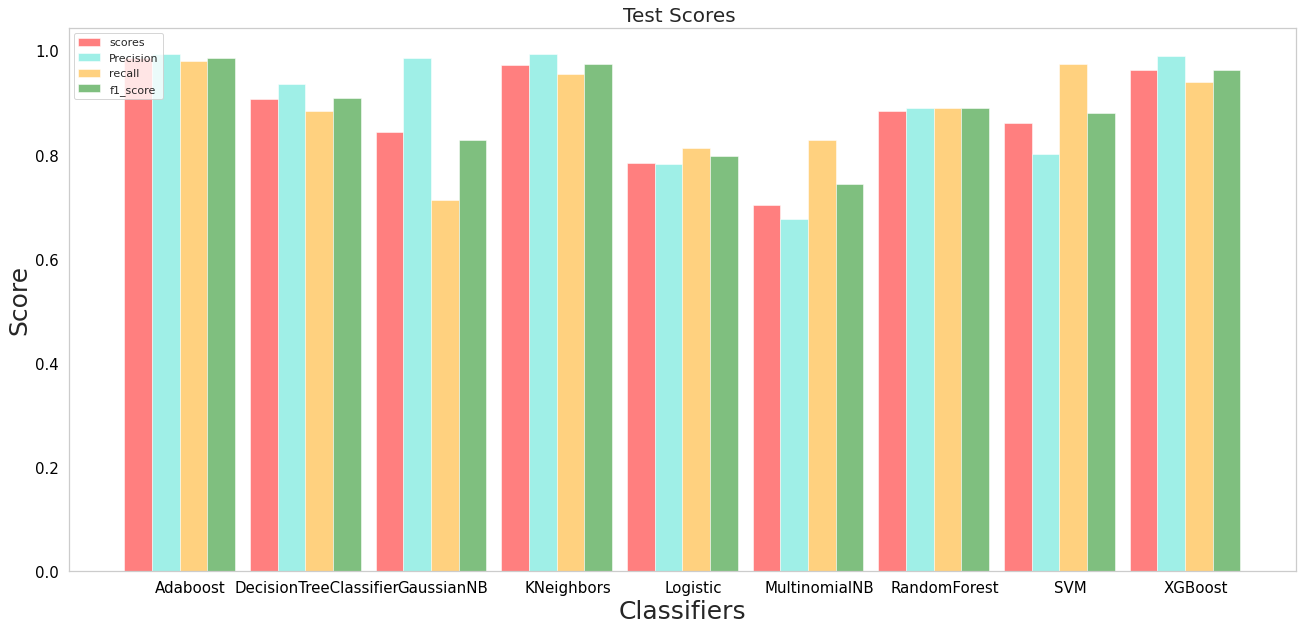

In [ ]:
pos = list(range(len(df['Classifier']))) 
width = 0.22 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(22,10)) 
plt.bar(pos,df1['scores'],width,alpha=0.5,color='red',label=df1['scores'][0]) 
plt.bar([p + width for p in pos],df1['Precision'],width,alpha=0.5,color='turquoise',label=df1['Precision'][1]) 
plt.bar([p + width*2 for p in pos],df1['Recall'],width,alpha=0.5, color='orange',label=df1['Recall']) 
plt.bar([p + width*3 for p in pos],df1['f1_score'],width,alpha=0.5, color='green',label=df1['f1_score']) 
ax.set_ylabel('Score',fontsize=25)
ax.set_xlabel('Classifiers',fontsize=25)
ax.set_title('Test Scores ',fontsize=20)
ax.set_xticks([p + 1.9 * width for p in pos])
ax.set_xticklabels(df['Classifier'])
plt.legend(['scores', 'Precision', 'recall','f1_score'], loc='upper left')
plt.grid()
plt.tick_params(axis='both', which='major', colors='black', labelsize=15)
plt.savefig('/content/drive/My Drive/COVID_19/covid2.png',dpi=300)

plt.show()